# Pricing Model

In [1]:
import pandas as pd
import numpy as np
import pack_utils
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
pm_starter = pack_utils.make_pricing_model_starter(pack_utils.LIST_OF_CSVS)

In [3]:
pm_starter['Pack'].value_counts()

Advanced          104
Reserves           79
Jumbo Supply       53
Expert             32
Premium            31
Supply             27
Ammo Priming       27
Technical Mods      5
Arsenal             3
Name: Pack, dtype: int64

In [4]:
pm_starter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361 entries, 2 to 326
Data columns (total 15 columns):
Pack               361 non-null object
AP/Creds           361 non-null object
Price              361 non-null float64
Common (C/W)       361 non-null int64
Uncommon (C/W)     361 non-null int64
Rare Mod           361 non-null int64
Rare Weap.         361 non-null int64
Rare Char.         361 non-null int64
UR Weap.           361 non-null int64
UR Char.           361 non-null int64
1 Level booster    361 non-null int64
2 Level booster    361 non-null int64
3 Level booster    361 non-null int64
4 Level booster    361 non-null int64
N. Consumbales     361 non-null int64
dtypes: float64(1), int64(12), object(2)
memory usage: 45.1+ KB


## UR True Credits Cost

In [5]:
sp_df = pack_utils.get_support_packs_df(pm_starter)

In [6]:
sp_df['Pack'].value_counts()

Jumbo Supply    53
Supply          27
Ammo Priming    27
Name: Pack, dtype: int64

In [7]:
sp_df['Price'].value_counts()

10000.0    80
2000.0     27
Name: Price, dtype: int64

In [8]:
support_cost = np.sum(sp_df['Price'])
print(support_cost)

854000.0


In [9]:
ur_df = pack_utils.get_ur_packs_df(pm_starter)

In [10]:
ur_df['Pack'].value_counts()

Reserves    79
Expert      32
Premium     31
Arsenal      3
Name: Pack, dtype: int64

In [11]:
ur_df['Price'].value_counts()

100000.0    113
50000.0      32
Name: Price, dtype: int64

In [12]:
ur_pack_cost = np.sum(ur_df['Price'])
print(ur_pack_cost)

12900000.0


In [13]:
n_ur_char, n_ur_weap = pack_utils.get_ur_counts(ur_df)
n_ur_tot = n_ur_weap + n_ur_char
print('Number of total URs =', n_ur_tot)

Number of total URs = 27


In [14]:
creds_per_ur = (ur_pack_cost + support_cost) / n_ur_tot
print(creds_per_ur)

509407.4074074074


## Boosters and Consumables Prices

### Global (over all packs)

In [15]:
bs_df = pack_utils.convert_ap_to_creds(pm_starter)

/Users/perdue/Dropbox/Data/RandomData/MEA/pack_utils.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  new_df['Price'][new_df['AP/Creds'] == 'AP'] *= AP_CREDS_CONV


In [16]:
bs_df = bs_df.drop(columns=['Pack', 'AP/Creds'])

Here, URs are confusing because their true value is not reflected in their appearance.

In [17]:
list(bs_df)

['Price',
 'Common (C/W)',
 'Uncommon (C/W)',
 'Rare Mod',
 'Rare Weap.',
 'Rare Char.',
 'UR Weap.',
 'UR Char.',
 '1 Level booster',
 '2 Level booster',
 '3 Level booster',
 '4 Level booster',
 'N. Consumbales']

In [18]:
bs_df['R/UR Weap.'] = bs_df['Rare Weap.'] + bs_df['UR Weap.']
bs_df['R/UR Char.'] = bs_df['Rare Char.'] + bs_df['UR Char.']

In [19]:
bs_df = bs_df.drop(columns=['Rare Weap.', 'Rare Char.', 'UR Weap.', 'UR Char.'])
print(list(bs_df))

['Price', 'Common (C/W)', 'Uncommon (C/W)', 'Rare Mod', '1 Level booster', '2 Level booster', '3 Level booster', '4 Level booster', 'N. Consumbales', 'R/UR Weap.', 'R/UR Char.']


In [20]:
bs_df['Price'].value_counts()

100000.0    113
20000.0     109
10000.0      80
50000.0      32
2000.0       27
Name: Price, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
bs_train, bs_test = train_test_split(bs_df, test_size=0.1, random_state=42)

In [23]:
print(bs_train['Price'].value_counts())
print(len(bs_train))

100000.0    99
20000.0     98
10000.0     75
50000.0     29
2000.0      23
Name: Price, dtype: int64
324


In [24]:
print(bs_test['Price'].value_counts())
print(len(bs_test))

100000.0    14
20000.0     11
10000.0      5
2000.0       4
50000.0      3
Name: Price, dtype: int64
37


In [25]:
bs_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 128 to 26
Data columns (total 11 columns):
Price              37 non-null float64
Common (C/W)       37 non-null int64
Uncommon (C/W)     37 non-null int64
Rare Mod           37 non-null int64
1 Level booster    37 non-null int64
2 Level booster    37 non-null int64
3 Level booster    37 non-null int64
4 Level booster    37 non-null int64
N. Consumbales     37 non-null int64
R/UR Weap.         37 non-null int64
R/UR Char.         37 non-null int64
dtypes: float64(1), int64(10)
memory usage: 3.5 KB


In [26]:
bs_target_train = bs_train['Price']
bs_target_test = bs_test['Price']
bs_train.drop(columns='Price', inplace=True)
bs_test.drop(columns='Price', inplace=True)

/Users/perdue/miniconda3/envs/py3tf16/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/perdue/miniconda3/envs/py3tf16/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [27]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [28]:
support_vector_regressor = SVR(kernel='linear')
support_vector_regressor.fit(bs_train, bs_target_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [29]:
test_set_predictions = support_vector_regressor.predict(bs_test)
lin_mse = mean_squared_error(test_set_predictions, bs_target_test)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

49728.76128233592


In [30]:
list(zip(test_set_predictions[:10], bs_target_test[:10]))

[(19639.813450292397, 20000.0),
 (20986.529824561403, 100000.0),
 (20641.44795321637, 20000.0),
 (19086.32222222222, 2000.0),
 (20844.570760233917, 50000.0),
 (20437.02105263158, 10000.0),
 (21131.529824561403, 100000.0),
 (20999.529824561403, 100000.0),
 (21131.529824561403, 100000.0),
 (20912.55029239766, 100000.0)]

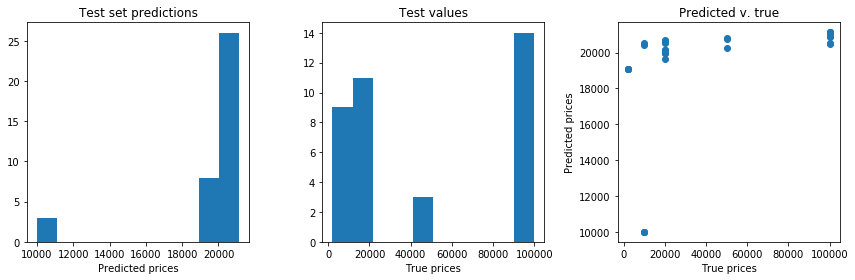

In [31]:
fig = plt.figure(figsize=(12,4))
gs = plt.GridSpec(1, 3)

ax = plt.subplot(gs[0])
n, bins, patches = plt.hist(test_set_predictions)
plt.title('Test set predictions')
plt.xlabel('Predicted prices')

ax = plt.subplot(gs[1])
n, bins, patches = plt.hist(bs_target_test)
plt.title('Test values')
plt.xlabel('True prices')

ax = plt.subplot(gs[2])
plt.scatter(bs_target_test, test_set_predictions)
plt.xlabel('True prices')
plt.ylabel('Predicted prices')
plt.title('Predicted v. true')

plt.tight_layout()

The SVR does a terrible job with high-priced packs...

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
lin_reg = LinearRegression()
lin_reg.fit(bs_train, bs_target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
test_set_predictions = lin_reg.predict(bs_test)
lin_mse = mean_squared_error(test_set_predictions, bs_target_test)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

6925.006751963465


In [35]:
list(zip(test_set_predictions[:10], bs_target_test[:10]))

[(13377.21662577333, 20000.0),
 (90346.5965002132, 100000.0),
 (18869.612763820114, 20000.0),
 (3482.895091704171, 2000.0),
 (65154.96187266431, 50000.0),
 (12341.839273283975, 10000.0),
 (102269.29121696854, 100000.0),
 (102140.0967922335, 100000.0),
 (102269.29121696854, 100000.0),
 (96507.27728443893, 100000.0)]

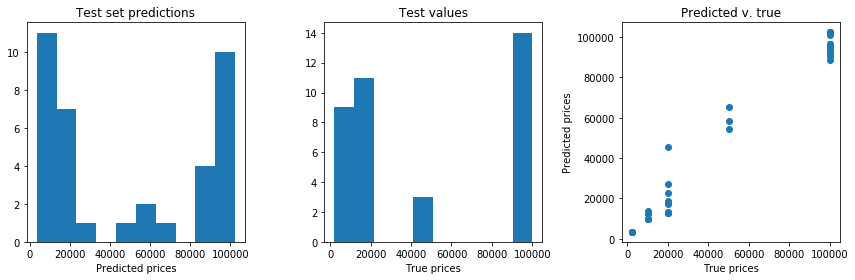

In [36]:
fig = plt.figure(figsize=(12,4))
gs = plt.GridSpec(1, 3)

ax = plt.subplot(gs[0])
n, bins, patches = plt.hist(test_set_predictions)
plt.title('Test set predictions')
plt.xlabel('Predicted prices')

ax = plt.subplot(gs[1])
n, bins, patches = plt.hist(bs_target_test)
plt.title('Test values')
plt.xlabel('True prices')

ax = plt.subplot(gs[2])
plt.scatter(bs_target_test, test_set_predictions)
plt.xlabel('True prices')
plt.ylabel('Predicted prices')
plt.title('Predicted v. true')

plt.tight_layout()

In [37]:
for x in zip(list(bs_train), lin_reg.coef_):
    print(x)

('Common (C/W)', 2147.51937712005)
('Uncommon (C/W)', 9854.066068939912)
('Rare Mod', 7037.067479405891)
('1 Level booster', -42.70305365115041)
('2 Level booster', 411.83651665689274)
('3 Level booster', 4627.984541592373)
('4 Level booster', 7590.521932045594)
('N. Consumbales', 414.2841051787973)
('R/UR Weap.', 42752.247388308664)
('R/UR Char.', 41206.38148071453)
